In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = sns.load_dataset('diamonds')

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
df = df[(df[["x","y","z"]]!=0).all(axis=1)]
len(df)

53920

Text(0, 0.5, 'price')

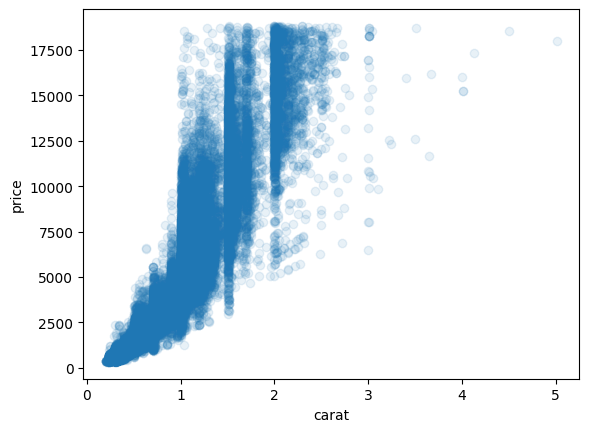

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

carat = df["carat"].values
price = df["price"].values

plt.scatter(carat, price, alpha=0.1)
plt.xlabel("carat")
plt.ylabel("price")

In [22]:
tst = pd.concat([df["carat"], df["price"]],axis=1)

In [23]:
tst.head()

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335


In [24]:
tst.corr()

,carat,price
carat,1.000000,0.921592
price,0.921592,1.000000


In [25]:
X = np.vstack([np.ones(len(carat)), carat]).T
X

array([[1.  , 0.23],
       [1.  , 0.21],
       [1.  , 0.23],
       ...,
       [1.  , 0.7 ],
       [1.  , 0.86],
       [1.  , 0.75]])

In [26]:
y = price

In [27]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [28]:
theta

array([-2255.76878704,  7755.76725406])

In [30]:
x_test = np.linspace(0, 3, 10) 
y_test = theta[0] + theta[1] * x_test 

Text(0, 0.5, 'price')

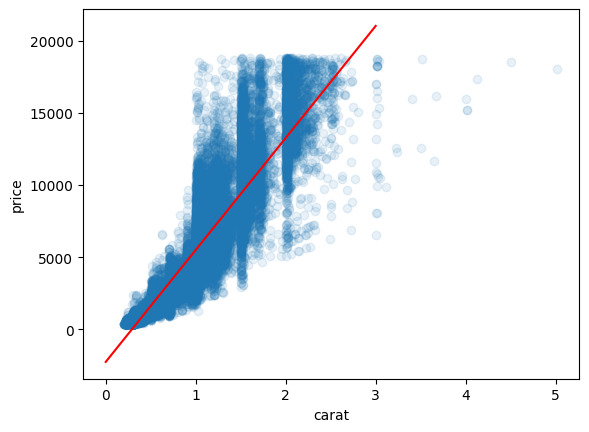

In [33]:
plt.scatter(carat, price, alpha=0.1)
plt.plot(x_test, y_test, 'red')
plt.xlabel('carat')
plt.ylabel('price')